# 차분(Differencing) 과 이동평균(MA) - Simple Trade Strategy

In [1]:
#!pip install finance-datareader
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import FinanceDataReader as fdr

## Price difference (익일 종가 - 당일 종가)

PriceDiff = (Close Price of tomorrow - Close Price of today)

- shift(period)

In [3]:
start = datetime.datetime(2020, 2, 19)

meta = fdr.DataReader("META", start)    #Facebook
ms = fdr.DataReader("MSFT", start)  #Microsoft

In [4]:
meta.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-19  217.990005  218.320007  216.110001  217.490005  217.490005   
2020-02-20  216.520004  218.770004  212.949997  214.580002  214.580002   
2020-02-21  213.479996  214.240005  208.830002  210.179993  210.179993   
2020-02-24  201.800003  203.649994  198.169998  200.720001  200.720001   
2020-02-25  202.250000  203.500000  195.949997  196.770004  196.770004   

              Volume  
Date                  
2020-02-19  12135100  
2020-02-20  13109200  
2020-02-21  14092300  
2020-02-24  23080100  
2020-02-25  21433500

In [5]:
meta.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], 
        axis=1, inplace=True)
ms.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], 
        axis=1, inplace=True)

In [6]:
meta['Yesterday Close'] = meta['Close'].shift(1)
meta.head()

Close  Yesterday Close
Date                                   
2020-02-19  217.490005              NaN
2020-02-20  214.580002       217.490005
2020-02-21  210.179993       214.580002
2020-02-24  200.720001       210.179993
2020-02-25  196.770004       200.720001

Price Difference - manual 계산

In [7]:
meta['Price Difference'] = meta['Close'] - meta['Yesterday Close']
meta.head()

Close  Yesterday Close  Price Difference
Date                                                     
2020-02-19  217.490005              NaN               NaN
2020-02-20  214.580002       217.490005         -2.910003
2020-02-21  210.179993       214.580002         -4.400009
2020-02-24  200.720001       210.179993         -9.459992
2020-02-25  196.770004       200.720001         -3.949997

Price Difference - diff() method 사용

In [8]:
meta['Price Diff2'] = meta['Close'].diff()
meta.head()

Close  Yesterday Close  Price Difference  Price Diff2
Date                                                                  
2020-02-19  217.490005              NaN               NaN          NaN
2020-02-20  214.580002       217.490005         -2.910003    -2.910003
2020-02-21  210.179993       214.580002         -4.400009    -4.400009
2020-02-24  200.720001       210.179993         -9.459992    -9.459992
2020-02-25  196.770004       200.720001         -3.949997    -3.949997

In [9]:
ms['Yesterday Close'] = ms['Close'].shift(1)
ms['Price Difference'] = ms['Close'].diff()
ms.head()

Close  Yesterday Close  Price Difference
Date                                                     
2020-02-19  187.279999              NaN               NaN
2020-02-20  184.419998       187.279999         -2.860001
2020-02-21  178.589996       184.419998         -5.830002
2020-02-24  170.889999       178.589996         -7.699997
2020-02-25  168.070007       170.889999         -2.819992

In [10]:
print(ms['Price Difference'].loc['2020-11-03'])

4.099990999999989


In [11]:
ms.head()

Close  Yesterday Close  Price Difference
Date                                                     
2020-02-19  187.279999              NaN               NaN
2020-02-20  184.419998       187.279999         -2.860001
2020-02-21  178.589996       184.419998         -5.830002
2020-02-24  170.889999       178.589996         -7.699997
2020-02-25  168.070007       170.889999         -2.819992

차분한 값으로부터 원래의 값 복원하기

In [12]:
ms['Price Difference'].cumsum() + ms['Close'][0]

Date
2020-02-19           NaN
2020-02-20    184.419998
2020-02-21    178.589996
2020-02-24    170.889999
2020-02-25    168.070007
                 ...    
2023-07-03    337.989990
2023-07-05    338.149994
2023-07-06    341.269989
2023-07-07    337.220001
2023-07-10    331.829987
Name: Price Difference, Length: 853, dtype: float64

## 일일 수익률 계산

- 1 주를 계속 보유하였다고 가정.  


- 계산 방법. 

- Daily Return = df/df.shift(1) - 1  
    or
- Daily Return[1:] = df[1:] / df[:-1].values - 1  
    or    
- Daily Return = df.pct_chage()

In [13]:
ms['Return'] = ms['Close'] / ms['Yesterday Close'] - 1
ms.head()

Close  Yesterday Close  Price Difference    Return
Date                                                               
2020-02-19  187.279999              NaN               NaN       NaN
2020-02-20  184.419998       187.279999         -2.860001 -0.015271
2020-02-21  178.589996       184.419998         -5.830002 -0.031613
2020-02-24  170.889999       178.589996         -7.699997 -0.043116
2020-02-25  168.070007       170.889999         -2.819992 -0.016502

In [14]:
ms.tail()

Close  Yesterday Close  Price Difference    Return
Date                                                               
2023-07-03  337.989990       340.540009         -2.550019 -0.007488
2023-07-05  338.149994       337.989990          0.160004  0.000473
2023-07-06  341.269989       338.149994          3.119995  0.009227
2023-07-07  337.220001       341.269989         -4.049988 -0.011867
2023-07-10  331.829987       337.220001         -5.390014 -0.015984

In [15]:
ms['Close'][1:] / ms['Close'][:-1].values - 1

Date
2020-02-20   -0.015271
2020-02-21   -0.031613
2020-02-24   -0.043116
2020-02-25   -0.016502
2020-02-26    0.012495
                ...   
2023-07-03   -0.007488
2023-07-05    0.000473
2023-07-06    0.009227
2023-07-07   -0.011867
2023-07-10   -0.015984
Name: Close, Length: 852, dtype: float64

In [16]:
ms['Close'].pct_change()

Date
2020-02-19         NaN
2020-02-20   -0.015271
2020-02-21   -0.031613
2020-02-24   -0.043116
2020-02-25   -0.016502
                ...   
2023-07-03   -0.007488
2023-07-05    0.000473
2023-07-06    0.009227
2023-07-07   -0.011867
2023-07-10   -0.015984
Name: Close, Length: 853, dtype: float64

In [17]:
print(f"{len(pd.date_range(ms.index[0], ms.index[-1]))} 일간 1 주를 계속 보유하였다면 누적 수익율은")
print((1+ms['Return']).cumprod())

1238 일간 1 주를 계속 보유하였다면 누적 수익율은
Date
2020-02-19         NaN
2020-02-20    0.984729
2020-02-21    0.953599
2020-02-24    0.912484
2020-02-25    0.897426
                ...   
2023-07-03    1.804731
2023-07-05    1.805585
2023-07-06    1.822245
2023-07-07    1.800619
2023-07-10    1.771839
Name: Return, Length: 853, dtype: float64


## 이동평균 - Moving average

- DataFrame.rolling()

In [18]:
# 3일 이동평균
(meta['Close'] + meta['Close'].shift(1) + meta['Close'].shift(2)) / 3

Date
2020-02-19           NaN
2020-02-20           NaN
2020-02-21    214.083333
2020-02-24    208.493332
2020-02-25    202.556666
                 ...    
2023-07-03    284.843333
2023-07-05    289.123332
2023-07-06    290.793325
2023-07-07    292.296661
2023-07-10    292.206665
Name: Close, Length: 853, dtype: float64

In [19]:
meta['Close'].rolling(3).mean()

Date
2020-02-19           NaN
2020-02-20           NaN
2020-02-21    214.083333
2020-02-24    208.493332
2020-02-25    202.556666
                 ...    
2023-07-03    284.843333
2023-07-05    289.123332
2023-07-06    290.793325
2023-07-07    292.296661
2023-07-10    292.206665
Name: Close, Length: 853, dtype: float64

### 이동평균 계산 및 이동평균선 시각화

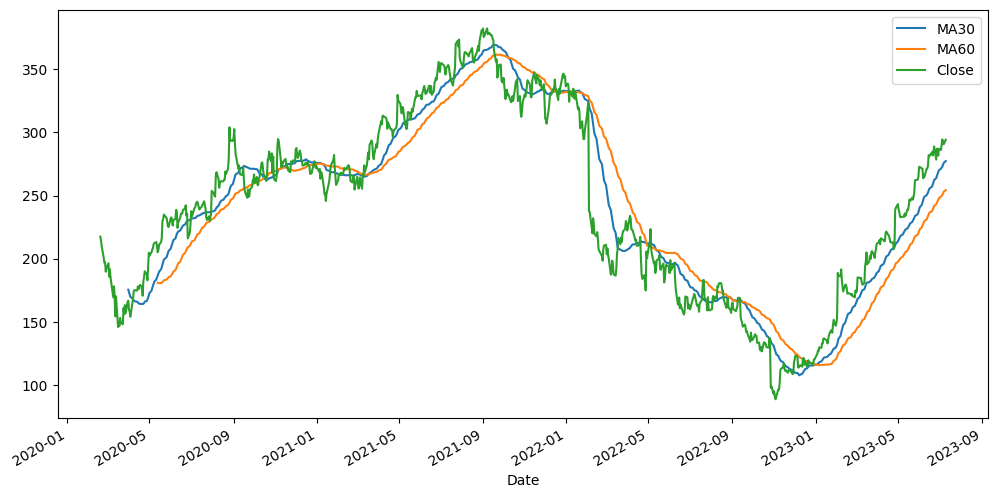

In [20]:
meta['ma30'] = meta['Close'].rolling(30).mean()
meta['ma60'] = meta['Close'].rolling(60).mean()#plot the moving average

#plot the moving average
plt.figure(figsize=(12, 6))
meta['ma30'].plot(label='MA30')
meta['ma60'].plot(label='MA60')
meta['Close'].plot(label='Close')
plt.legend()

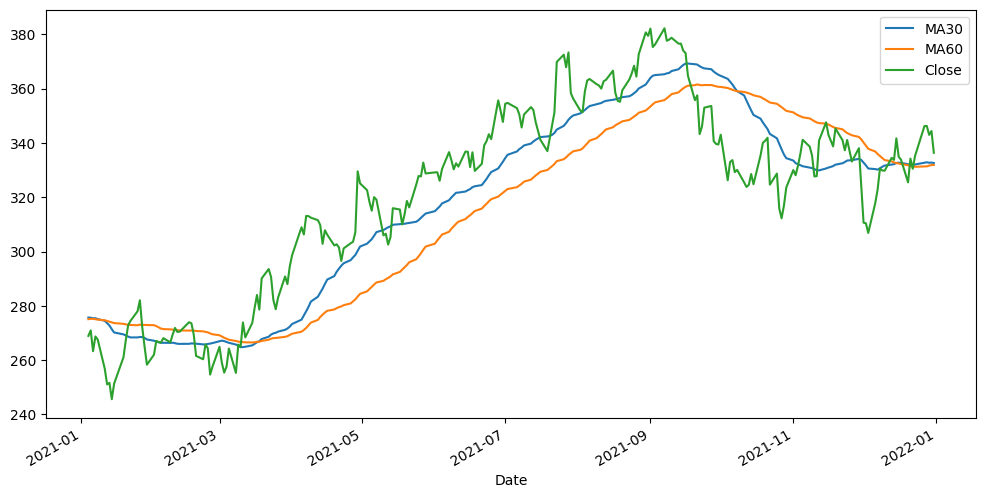

In [21]:
#특정 기간을 slicing한 이동평균 plot
plt.figure(figsize=(12, 6))
meta['ma30'].loc['2021-01-01':'2021-12-31'].plot(label='MA30')
meta['ma60'].loc['2021-01-01':'2021-12-31'].plot(label='MA60')
meta['Close'].loc['2021-01-01':'2021-12-31'].plot(label='Close')
plt.legend()
plt.show()

## EWMA (Exponentially-weighted moving average)


SMA(Simple Moving Average)에는 몇 가지 "약점"이 있습니다.
* window 가 작을수록 신호가 아닌 잡음이 증가합니다.
* 항상 window 크기만큼 지연됩니다.
* 평균화로 인해 데이터의 전체 피크 또는 계곡에 도달하지 않습니다.
* 미래의 움직임에 대해 실제로 알려주지 않습니다. 실제로는 데이터의 trend를 묘사하는 것입니다.
* 극단적인 historical value 로 인해 SMA가 크게 왜곡 될 수 있습니다.

이러한 문제를 해결하기 위해 EWMA (지수 가중 이동 평균)를 사용할 수 있습니다.

In [22]:
df = yf.download('AAPL', start='2020-01-01', end='2020-06-30', progress=False)
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.head()

Close
Date                 
2020-01-02  75.087502
2020-01-03  74.357498
2020-01-06  74.949997
2020-01-07  74.597504
2020-01-08  75.797501

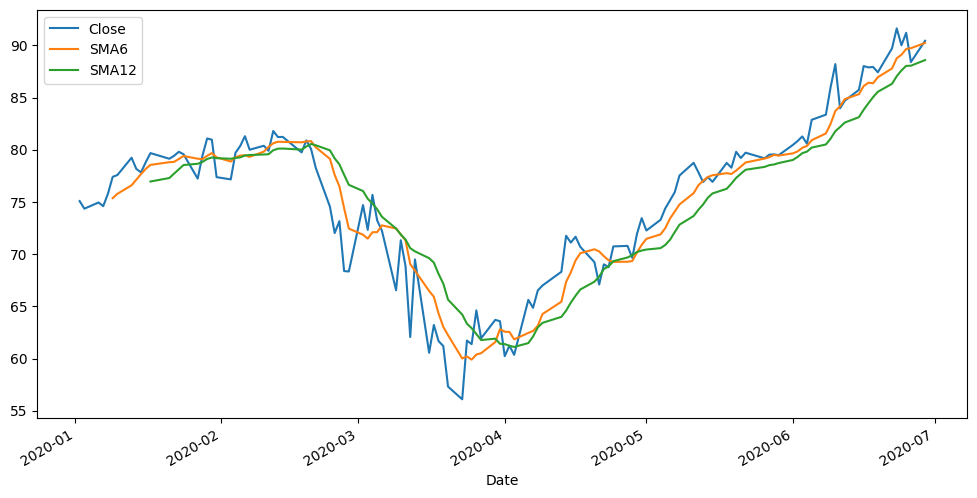

In [23]:
#SMA : Simple Moving Average

df['SMA6'] = df['Close'].rolling(window=6).mean()
df['SMA12'] = df['Close'].rolling(window=12).mean()
df.plot(figsize=(12, 6));

- EWMA를 사용하면 SMA의 지연 효과를 줄일 수 있으며 최근에 발생한 값에 더 많은 가중치를 적용합니다.  

- 가장 최근 값에 적용되는 가중치는 EWMA에 사용된 실제 매개 변수와 window 크기로 지정된 기간에 따라 다릅니다.

EWMA 공식은 다음과 같습니다.

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

$x_t$ 는 입력값, $w_i$ 는 적용된 weight (i=0 에서 t 사이로 변할 수 있음). $y_t$ 는 산출된 값입니다.

In [24]:
df['EWMA12'] = df['Close'].ewm(span=12).mean()
df.tail()

Close       SMA6      SMA12     EWMA12
Date                                                  
2020-06-23  91.632500  88.771666  87.052082  87.036708
2020-06-24  90.014999  89.104167  87.606249  87.494907
2020-06-25  91.209999  89.656250  88.040624  88.066459
2020-06-26  88.407501  89.735416  88.057082  88.118927
2020-06-29  90.445000  90.237916  88.596249  88.476785

<Axes: xlabel='Date'>

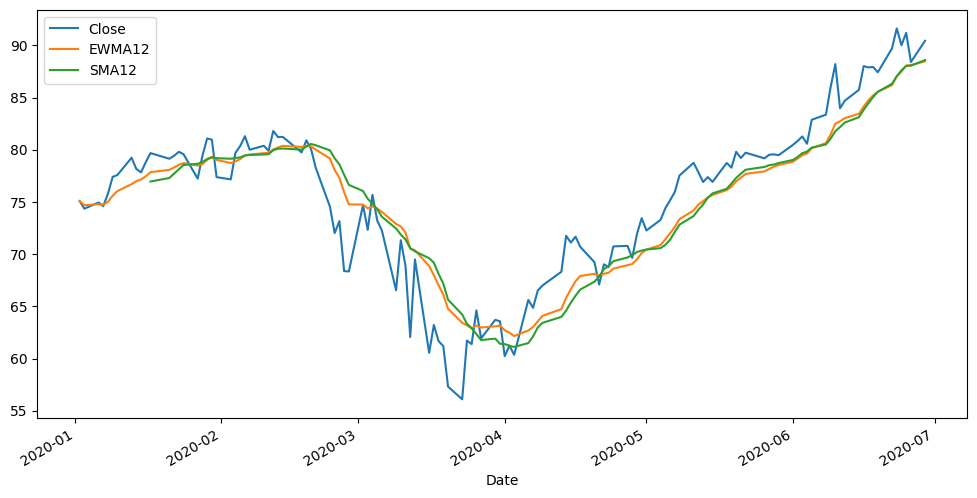

In [25]:
df[['Close', 'EWMA12', 'SMA12']].plot(figsize=(12, 6))